<a href="https://colab.research.google.com/github/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/blob/main/Code_Notebooks/07_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/2_clusters_only_on_output.csv

--2025-04-13 19:57:34--  https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/2_clusters_only_on_output.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5557 (5.4K) [text/plain]
Saving to: ‘2_clusters_only_on_output.csv’

2_clusters_only_on_ 100%[===================>]   5.43K  --.-KB/s    in 0s      

2025-04-13 19:57:34 (51.3 MB/s) - ‘2_clusters_only_on_output.csv’ saved [5557/5557]



In [3]:
!wget https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_one_hot_encoded.csv

--2025-04-13 19:57:34--  https://raw.githubusercontent.com/UtkarshRaj130/Advanced_Soybean_Agricultural_Dataset_Analysis/refs/heads/main/Dataset/3_one_hot_encoded.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13442 (13K) [text/plain]
Saving to: ‘3_one_hot_encoded.csv’

3_one_hot_encoded.c 100%[===================>]  13.13K  --.-KB/s    in 0.001s  

2025-04-13 19:57:34 (11.2 MB/s) - ‘3_one_hot_encoded.csv’ saved [13442/13442]



In [4]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_selection import mutual_info_regression

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.model_selection import ParameterGrid

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

# Data
This dataset contains the classes obtained upon binary clustering of selected parameters from previous steps

In [5]:
data=pd.read_csv('2_clusters_only_on_output.csv')

In [6]:
data

,Sugars (Su),Weight of 300 Seeds (W3S),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Percentage (PPE),Protein Content (PCO),Cluster,Cluster Label
0,0.433,33.6,5567.4,1.86,33.2,0.82,1,Poor Production
1,0.334,34.4,2245.5,1.87,38.5,0.13,1,Poor Production
2,0.490,35.2,4326.7,2.04,33.6,0.15,1,Poor Production
3,0.163,52.3,6214.5,2.20,33.5,0.14,0,Good Production
4,0.795,31.2,3897.8,1.88,39.6,0.60,1,Poor Production
...,...,...,...,...,...,...,...,...
103,0.663,31.2,4472.7,2.60,39.7,0.32,0,Good Production
104,0.165,34.5,5643.7,2.60,33.6,0.36,0,Good Production
105,1.115,37.2,3067.1,1.80,37.2,1.15,1,Poor Production
106,0.295,35.3,3112.2,2.10,32.3,0.17,1,Poor Production


In [7]:
data_original=pd.read_csv('3_one_hot_encoded.csv')

In [8]:
data_original=data_original.drop(columns=['Parameters','Random '])

In [9]:
data_original

,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),...,Number of Seeds per Pod (NSP),Protein Content (PCO),C_2,S_2,S_3,G_2,G_3,G_4,G_5,G_6
0,50.5,130.3,111,0.433,0.732,1.4,3.1,33.2,33.6,0.08,...,1.86,0.82,False,False,False,False,False,False,True,False
1,44.5,132.0,80,0.334,0.674,7.1,2.2,38.5,34.4,0.09,...,1.87,0.13,True,False,True,False,False,True,False,False
2,52.2,150.0,83,0.490,0.677,1.8,1.3,33.6,35.2,0.07,...,2.04,0.15,True,False,False,False,False,False,False,True
3,50.5,140.8,66,0.163,0.745,1.1,3.0,33.5,52.3,0.09,...,2.20,0.14,False,False,False,False,False,False,False,False
4,49.2,175.6,73,0.795,0.725,7.5,2.1,39.6,31.2,0.10,...,1.88,0.60,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,44.0,209.0,132,0.663,0.875,9.0,1.3,39.7,31.2,0.06,...,2.60,0.32,False,True,False,False,True,False,False,False
104,53.3,160.0,130,0.165,0.651,1.8,3.2,33.6,34.5,0.10,...,2.60,0.36,False,False,True,True,False,False,False,False
105,50.2,148.3,151,1.115,0.683,6.1,1.2,37.2,37.2,0.10,...,1.80,1.15,True,False,False,False,False,False,True,False
106,52.2,156.0,66,0.295,0.632,6.9,1.1,32.3,35.3,0.09,...,2.10,0.17,True,True,False,False,False,True,False,False


In [10]:
def training_variable_split_CGS(data):
  training_variables=data.columns[-8:]
  data_X=pd.DataFrame(data[training_variables])
  for i in training_variables:
    data_X[i]=data_X[i].map({False:0,True:1})
  # data_X=data_X.map({'False':0,'True':1})
  return data_X
def training_variable_split_output(data):
  training_variables=data.columns[:-8]
  data_X=pd.DataFrame(data[training_variables])
  return data_X

In [11]:
def target_variable_split(data):
  target=data.columns[-2]
  data_Y=pd.DataFrame(data[target])
  return data_Y

In [12]:
data_Y=target_variable_split(data)

In [13]:
data_X=training_variable_split_CGS(data_original)
data_X1=training_variable_split_output(data_original)

In [14]:
data_X

,C_2,S_2,S_3,G_2,G_3,G_4,G_5,G_6
0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,1,0,0
2,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
103,0,1,0,0,1,0,0,0
104,0,0,1,1,0,0,0,0
105,1,0,0,0,0,0,1,0
106,1,1,0,0,0,1,0,0


In [15]:
data_X1

,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)
0,50.5,130.3,111,0.433,0.732,1.4,3.1,33.2,33.6,0.08,5567.4,1.86,0.82
1,44.5,132.0,80,0.334,0.674,7.1,2.2,38.5,34.4,0.09,2245.5,1.87,0.13
2,52.2,150.0,83,0.490,0.677,1.8,1.3,33.6,35.2,0.07,4326.7,2.04,0.15
3,50.5,140.8,66,0.163,0.745,1.1,3.0,33.5,52.3,0.09,6214.5,2.20,0.14
4,49.2,175.6,73,0.795,0.725,7.5,2.1,39.6,31.2,0.10,3897.8,1.88,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,44.0,209.0,132,0.663,0.875,9.0,1.3,39.7,31.2,0.06,4472.7,2.60,0.32
104,53.3,160.0,130,0.165,0.651,1.8,3.2,33.6,34.5,0.10,5643.7,2.60,0.36
105,50.2,148.3,151,1.115,0.683,6.1,1.2,37.2,37.2,0.10,3067.1,1.80,1.15
106,52.2,156.0,66,0.295,0.632,6.9,1.1,32.3,35.3,0.09,3112.2,2.10,0.17


In [16]:
data_X2=pd.DataFrame(data_X1)
data_X2[data_X.columns]=data_X

In [17]:
data_X2

,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),...,Number of Seeds per Pod (NSP),Protein Content (PCO),C_2,S_2,S_3,G_2,G_3,G_4,G_5,G_6
0,50.5,130.3,111,0.433,0.732,1.4,3.1,33.2,33.6,0.08,...,1.86,0.82,0,0,0,0,0,0,1,0
1,44.5,132.0,80,0.334,0.674,7.1,2.2,38.5,34.4,0.09,...,1.87,0.13,1,0,1,0,0,1,0,0
2,52.2,150.0,83,0.490,0.677,1.8,1.3,33.6,35.2,0.07,...,2.04,0.15,1,0,0,0,0,0,0,1
3,50.5,140.8,66,0.163,0.745,1.1,3.0,33.5,52.3,0.09,...,2.20,0.14,0,0,0,0,0,0,0,0
4,49.2,175.6,73,0.795,0.725,7.5,2.1,39.6,31.2,0.10,...,1.88,0.60,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,44.0,209.0,132,0.663,0.875,9.0,1.3,39.7,31.2,0.06,...,2.60,0.32,0,1,0,0,1,0,0,0
104,53.3,160.0,130,0.165,0.651,1.8,3.2,33.6,34.5,0.10,...,2.60,0.36,0,0,1,1,0,0,0,0
105,50.2,148.3,151,1.115,0.683,6.1,1.2,37.2,37.2,0.10,...,1.80,1.15,1,0,0,0,0,0,1,0
106,52.2,156.0,66,0.295,0.632,6.9,1.1,32.3,35.3,0.09,...,2.10,0.17,1,1,0,0,0,1,0,0


In [18]:
def train_test_split_data(data_X,data_Y):
  data_X_train,data_X_temp,data_Y_train,data_Y_temp=train_test_split(data_X,data_Y,test_size=0.2,random_state=42)
  data_X_valid,data_X_test,data_Y_valid,data_Y_test=train_test_split(data_X_temp,data_Y_temp,test_size=0.5,random_state=42)
  return data_X_train,data_X_valid,data_X_test,data_Y_train,data_Y_valid,data_Y_test

In [19]:
#CGS parameters
data_X_train,data_X_valid,data_X_test,data_Y_train,data_Y_valid,data_Y_test=train_test_split_data(data_X,data_Y)
# Output parameters
data_X1_train,data_X1_valid,data_X1_test,data_Y1_train,data_Y1_valid,data_Y1_test=train_test_split_data(data_X1,data_Y)
# All parameters
data_X2_train,data_X2_valid,data_X2_test,data_Y2_train,data_Y2_valid,data_Y2_test=train_test_split_data(data_X2,data_Y)

In [20]:
data.drop(columns=['Cluster Label']).corr()

,Sugars (Su),Weight of 300 Seeds (W3S),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Percentage (PPE),Protein Content (PCO),Cluster
Sugars (Su),1.000000,-0.250074,-0.255296,-0.205621,-0.000679,0.450942,0.332363
Weight of 300 Seeds (W3S),-0.250074,1.000000,0.438026,0.057696,-0.035110,0.072685,-0.529496
Seed Yield per Unit Area (SYUA),-0.255296,0.438026,1.000000,0.353017,0.032834,-0.023012,-0.640753
Number of Seeds per Pod (NSP),-0.205621,0.057696,0.353017,1.000000,0.092262,-0.263086,-0.609895
Protein Percentage (PPE),-0.000679,-0.035110,0.032834,0.092262,1.000000,-0.036795,-0.130952
Protein Content (PCO),0.450942,0.072685,-0.023012,-0.263086,-0.036795,1.000000,0.081490
Cluster,0.332363,-0.529496,-0.640753,-0.609895,-0.130952,0.081490,1.000000


# **Classification using Random Forest**
## Classification is performed on C,G and S parameters as well as on all output phenotypes that can be measured once the yield is produced

In [21]:
hyper_parameters={
    'n_estimators':[20,50,100],
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
randomForest=RandomForestClassifier()

In [22]:
def GridSearch_BestModel(model,hyper_parameters,data_X_train,data_Y_train):
  grid_search=GridSearchCV(model,hyper_parameters,cv=5,scoring='accuracy',n_jobs=-1)
  grid_search.fit(data_X_train,data_Y_train)
  best_model=grid_search.best_estimator_
  print(grid_search.best_params_)
  return best_model

In [23]:
# best_randomForest=GridSearch_BestModel(randomForest,hyper_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20} <br>
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}

In [24]:
def evaluate_model(model,data_X_valid,data_Y_valid,data_X_test,data_Y_test):
  evaluation={'validation':[],'test':[]}
  predicted_valid=model.predict(data_X_valid)
  predicted_test=model.predict(data_X_test)

  print('Accuracy Score')
  print('Validation Set:',accuracy_score(data_Y_valid,predicted_valid))
  print('Test Set:',accuracy_score(data_Y_test,predicted_test))

  print('\nPrecision Score')
  print('Validation Set: ',precision_score(data_Y_valid,predicted_valid))
  print('Test Set: ',precision_score(data_Y_test,predicted_test))

  print('\nRecall Score')
  print('Validation Set: ',recall_score(data_Y_valid,predicted_valid))
  print('Test Set: ',recall_score(data_Y_test,predicted_test))

  print('\nF1 Score')
  print('Validation Set: ',f1_score(data_Y_valid,predicted_valid))
  print('Test Set: ',f1_score(data_Y_test,predicted_test))

  evaluation['validation'].append(accuracy_score(data_Y_valid,predicted_valid))
  evaluation['test'].append(accuracy_score(data_Y_test,predicted_test))
  evaluation['validation'].append(precision_score(data_Y_valid,predicted_valid))
  evaluation['test'].append(precision_score(data_Y_test,predicted_test))
  evaluation['validation'].append(recall_score(data_Y_valid,predicted_valid))
  evaluation['test'].append(recall_score(data_Y_test,predicted_test))
  evaluation['validation'].append(f1_score(data_Y_valid,predicted_valid))
  evaluation['test'].append(f1_score(data_Y_test,predicted_test))

  print("Confusion Matrix")
  print("\nValidation Set\n")
  print(confusion_matrix(data_Y_valid,predicted_valid))
  print("\nTest Set\n")
  print(confusion_matrix(data_Y_test,predicted_test))

  return evaluation


# **Random Forest Algorithm on all input genotypes**

In [25]:
best_randomForest=RandomForestClassifier(criterion='gini',max_depth=5,min_samples_leaf=1,min_samples_split=2,n_estimators=20)
best_randomForest.fit(data_X_train,data_Y_train)
results=evaluate_model(best_randomForest,data_X_valid,data_Y_valid,data_X_test,data_Y_test)

Accuracy Score
Validation Set: 0.8181818181818182
Test Set: 0.7272727272727273

Precision Score
Validation Set:  1.0
Test Set:  0.7142857142857143

Recall Score
Validation Set:  0.7777777777777778
Test Set:  0.8333333333333334

F1 Score
Validation Set:  0.875
Test Set:  0.7692307692307693
Confusion Matrix

Validation Set

[[2 0]
 [2 7]]

Test Set

[[3 2]
 [1 5]]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [26]:
results

{'validation': [0.8181818181818182, 1.0, 0.7777777777777778, 0.875],
 'test': [0.7272727272727273,
  0.7142857142857143,
  0.8333333333333334,
  0.7692307692307693]}

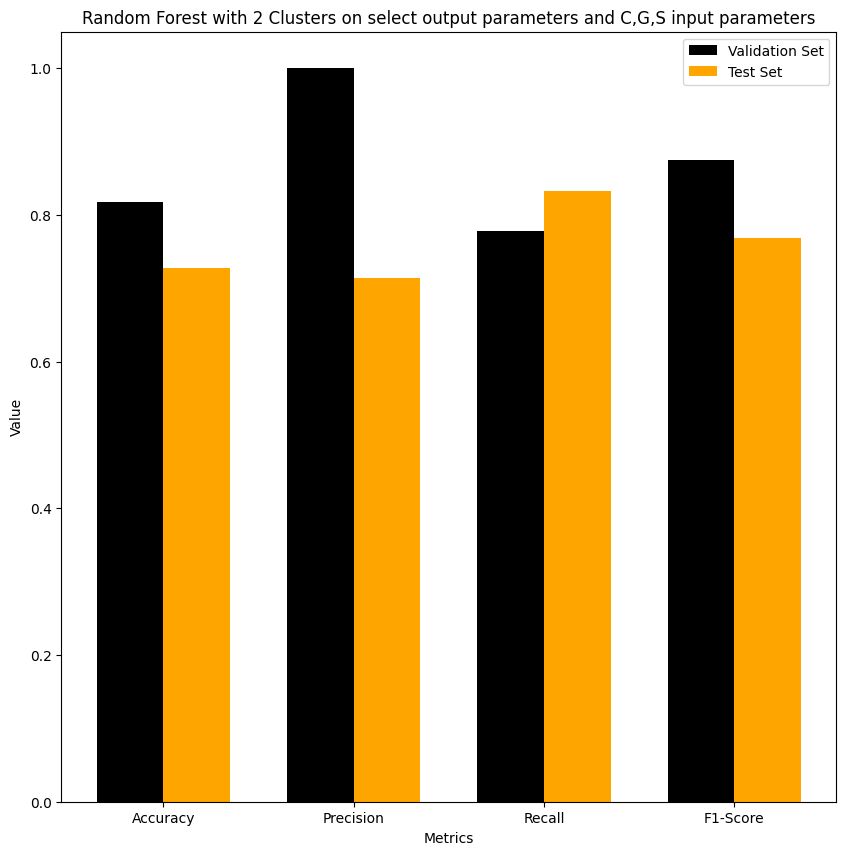

In [27]:
metrics=['Accuracy','Precision','Recall','F1-Score']
x=np.arange(len(metrics))
barwidth=0.35
plt.figure(figsize=(10,10))
plt.bar(x-barwidth/2,results['validation'],label='Validation Set',color='black',width=0.35)
plt.bar(x+barwidth/2,results['test'],label='Test Set',color='orange',width=0.35)
plt.xticks(x,metrics)
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.title('Random Forest with 2 Clusters on select output parameters and C,G,S input parameters')
plt.legend()
plt.show()

# **Random Forest Algorithm on all output parameters - phenotypes**

In [28]:
hyper_parameters={
    'n_estimators':[20,50,100],
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
randomForest=RandomForestClassifier()

In [29]:
# best_randomForest=GridSearch_BestModel(randomForest,hyper_parameters,data_X1_train,data_Y1_train)
# {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50} - hyperparameters for the best result
# parameters from Grid Search CV

In [30]:
best_randomForest=RandomForestClassifier(criterion='entropy',max_depth=5,min_samples_leaf=2,min_samples_split=5,n_estimators=50)
best_randomForest.fit(data_X1_train,data_Y1_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50)

In [31]:
results_output=evaluate_model(best_randomForest,data_X1_valid,data_Y1_valid,data_X1_test,data_Y1_test)

Accuracy Score
Validation Set: 0.9090909090909091
Test Set: 0.8181818181818182

Precision Score
Validation Set:  0.9
Test Set:  0.8333333333333334

Recall Score
Validation Set:  1.0
Test Set:  0.8333333333333334

F1 Score
Validation Set:  0.9473684210526315
Test Set:  0.8333333333333334
Confusion Matrix

Validation Set

[[1 1]
 [0 9]]

Test Set

[[4 1]
 [1 5]]


In [32]:
results_output

{'validation': [0.9090909090909091, 0.9, 1.0, 0.9473684210526315],
 'test': [0.8181818181818182,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334]}

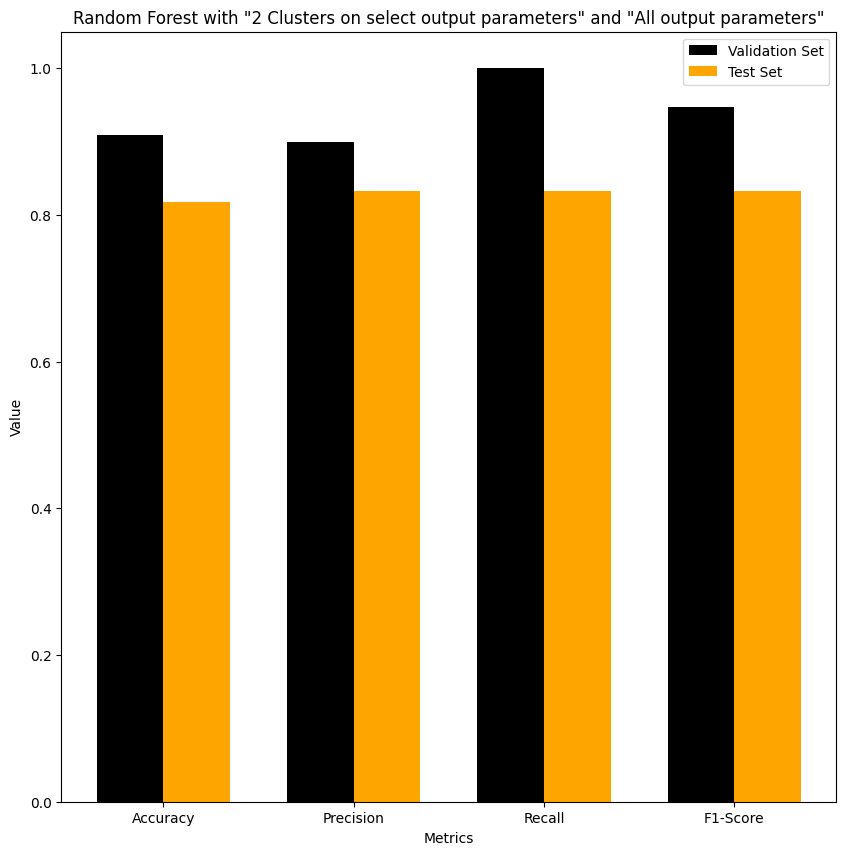

In [33]:
metrics=['Accuracy','Precision','Recall','F1-Score']
x=np.arange(len(metrics))
barwidth=0.35
plt.figure(figsize=(10,10))
plt.bar(x-barwidth/2,results_output['validation'],label='Validation Set',color='black',width=0.35)
plt.bar(x+barwidth/2,results_output['test'],label='Test Set',color='orange',width=0.35)
plt.xticks(x,metrics)
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.title('Random Forest with "2 Clusters on select output parameters" and "All output parameters"')
plt.legend()
plt.show()

# **Random Forest on all variables input and output**

In [34]:
hyper_parameters={
    'n_estimators':[20,50,100],
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
randomForest=RandomForestClassifier()

In [35]:
# best_randomForest=GridSearch_BestModel(randomForest,hyper_parameters,data_X2_train,data_Y2_train)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50} - hyperparameters for all parameters

In [36]:
random_forest_all_parameters=RandomForestClassifier(criterion='gini',max_depth=7,min_samples_leaf=1,min_samples_split=10,n_estimators=50)
random_forest_all_parameters.fit(data_X2_train,data_Y2_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=7, min_samples_split=10, n_estimators=50)

In [37]:
results_allParams=evaluate_model(random_forest_all_parameters,data_X2_valid,data_Y2_valid,data_X2_test,data_Y2_test)

Accuracy Score
Validation Set: 0.9090909090909091
Test Set: 0.8181818181818182

Precision Score
Validation Set:  0.9
Test Set:  0.8333333333333334

Recall Score
Validation Set:  1.0
Test Set:  0.8333333333333334

F1 Score
Validation Set:  0.9473684210526315
Test Set:  0.8333333333333334
Confusion Matrix

Validation Set

[[1 1]
 [0 9]]

Test Set

[[4 1]
 [1 5]]


In [38]:
results_allParams

{'validation': [0.9090909090909091, 0.9, 1.0, 0.9473684210526315],
 'test': [0.8181818181818182,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334]}

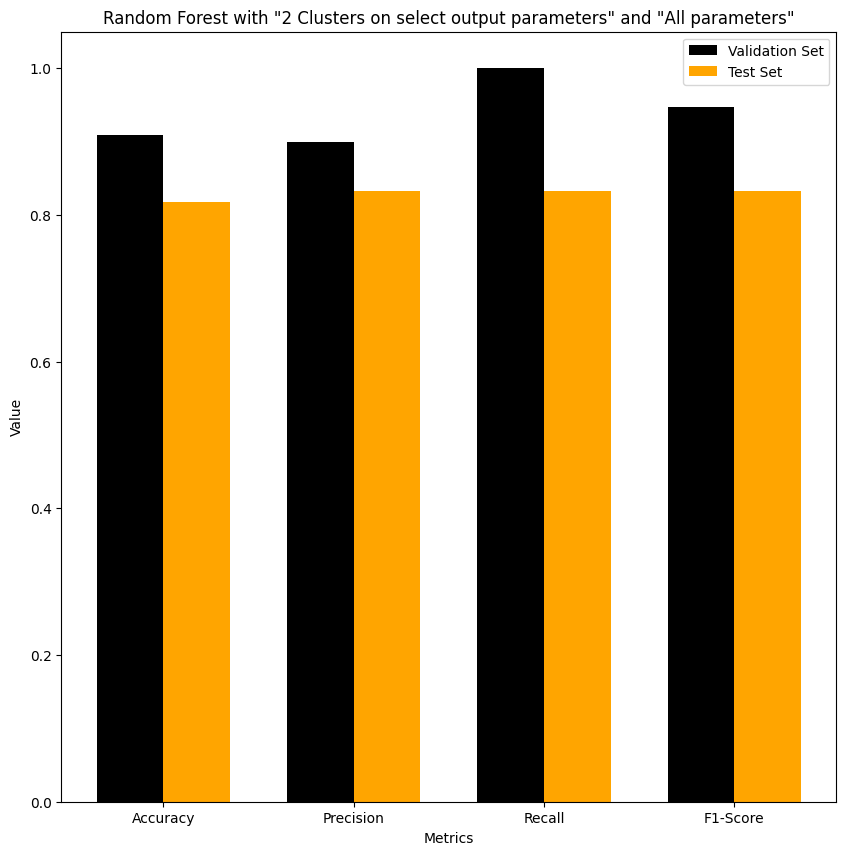

In [39]:
metrics=['Accuracy','Precision','Recall','F1-Score']
x=np.arange(len(metrics))
barwidth=0.35
plt.figure(figsize=(10,10))
plt.bar(x-barwidth/2,results_allParams['validation'],label='Validation Set',color='black',width=0.35)
plt.bar(x+barwidth/2,results_allParams['test'],label='Test Set',color='orange',width=0.35)
plt.xticks(x,metrics)
plt.ylabel('Value')
plt.xlabel('Metrics')
plt.title('Random Forest with "2 Clusters on select output parameters" and "All parameters"')
plt.legend()
plt.show()